In [2011]:
# Import necessary libraries
!pip install ucimlrepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
air_quality = fetch_ucirepo(id=360) 
  
# data (as pandas dataframes) 
X = air_quality.data.features 
df = X
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139
9356,4/4/2005,14:00:00,2.2,1071,-200,11.9,1047,265,654,168,1129,816,28.5,13.1,0.5028


In [2012]:
# information about the dataset and checking if the dataset is having any Null value
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB


(None, (9357, 15))

In [2013]:
df.isnull().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)         False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [2014]:
unique_values = df['Time'].unique()

# Display the unique values
print(unique_values)

['18:00:00' '19:00:00' '20:00:00' '21:00:00' '22:00:00' '23:00:00'
 '0:00:00' '1:00:00' '2:00:00' '3:00:00' '4:00:00' '5:00:00' '6:00:00'
 '7:00:00' '8:00:00' '9:00:00' '10:00:00' '11:00:00' '12:00:00' '13:00:00'
 '14:00:00' '15:00:00' '16:00:00' '17:00:00']


In [2015]:
#df.dropna(inplace=True)
df.set_index("Date", inplace=True)
df.index = pd.to_datetime(df.index)
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [2016]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

In [2017]:
df.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,,
2004-03-10,18,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2004-03-10,19,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2004-03-10,20,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
2004-03-10,21,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
2004-03-10,22,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [2018]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 to 2005-04-04
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   int64  
 1   CO(GT)         9357 non-null   float64
 2   PT08.S1(CO)    9357 non-null   int64  
 3   NMHC(GT)       9357 non-null   int64  
 4   C6H6(GT)       9357 non-null   float64
 5   PT08.S2(NMHC)  9357 non-null   int64  
 6   NOx(GT)        9357 non-null   int64  
 7   PT08.S3(NOx)   9357 non-null   int64  
 8   NO2(GT)        9357 non-null   int64  
 9   PT08.S4(NO2)   9357 non-null   int64  
 10  PT08.S5(O3)    9357 non-null   int64  
 11  T              9357 non-null   float64
 12  RH             9357 non-null   float64
 13  AH             9357 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 1.1 MB


In [2019]:
df.describe()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,11.498557,-34.207524,1048.990061,-159.090093,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,6.923182,77.657170,329.832710,139.789093,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,0.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,5.000000,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,11.000000,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,18.000000,2.600000,1221.000000,-200.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,23.000000,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [2020]:
# Column wise we see "-200" value , this value we need to fix by using forward fill method , using the mean value#
df[df != -200].isna().sum()

Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [2021]:
df.replace(to_replace= -200, value= np.NaN, inplace= True)
def remove_outlier(col):
    df[col] = df.groupby('Date')[col].transform(lambda x: x.fillna(x.mean()))
    
col_list = df.columns[1:]

for i in col_list:
    remove_outlier(i)
df.fillna(method='ffill', inplace= True)
df.isnull().any()

Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)         False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [2022]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 to 2005-04-04
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Time           9357 non-null   int64  
 1   CO(GT)         9357 non-null   float64
 2   PT08.S1(CO)    9357 non-null   float64
 3   NMHC(GT)       9357 non-null   float64
 4   C6H6(GT)       9357 non-null   float64
 5   PT08.S2(NMHC)  9357 non-null   float64
 6   NOx(GT)        9357 non-null   float64
 7   PT08.S3(NOx)   9357 non-null   float64
 8   NO2(GT)        9357 non-null   float64
 9   PT08.S4(NO2)   9357 non-null   float64
 10  PT08.S5(O3)    9357 non-null   float64
 11  T              9357 non-null   float64
 12  RH             9357 non-null   float64
 13  AH             9357 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 1.1 MB


,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,11.498557,2.082589,1099.748224,266.259724,10.050981,937.915962,239.419651,835.378257,109.382418,1449.952952,1026.513193,18.167474,49.288300,1.018346
std,6.923182,1.383347,215.205784,70.688371,7.368172,264.142162,200.833596,253.425632,46.058214,344.209200,398.438298,8.833685,17.200755,0.403606
min,0.000000,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,5.000000,1.100000,939.000000,275.000000,4.500000,734.000000,102.000000,663.000000,76.000000,1223.000000,736.000000,11.500000,36.123529,0.727600
50%,11.000000,1.700000,1065.000000,275.000000,8.200000,908.000000,177.000000,807.476190,103.608696,1454.000000,966.000000,17.600000,49.600000,0.988100
75%,18.000000,2.700000,1226.647059,275.000000,14.000000,1118.000000,316.000000,967.000000,135.000000,1662.000000,1275.000000,24.300000,62.500000,1.309917
max,23.000000,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


### Exploratory Data Analysis (EDA)

<Figure size 25000x10000 with 0 Axes>

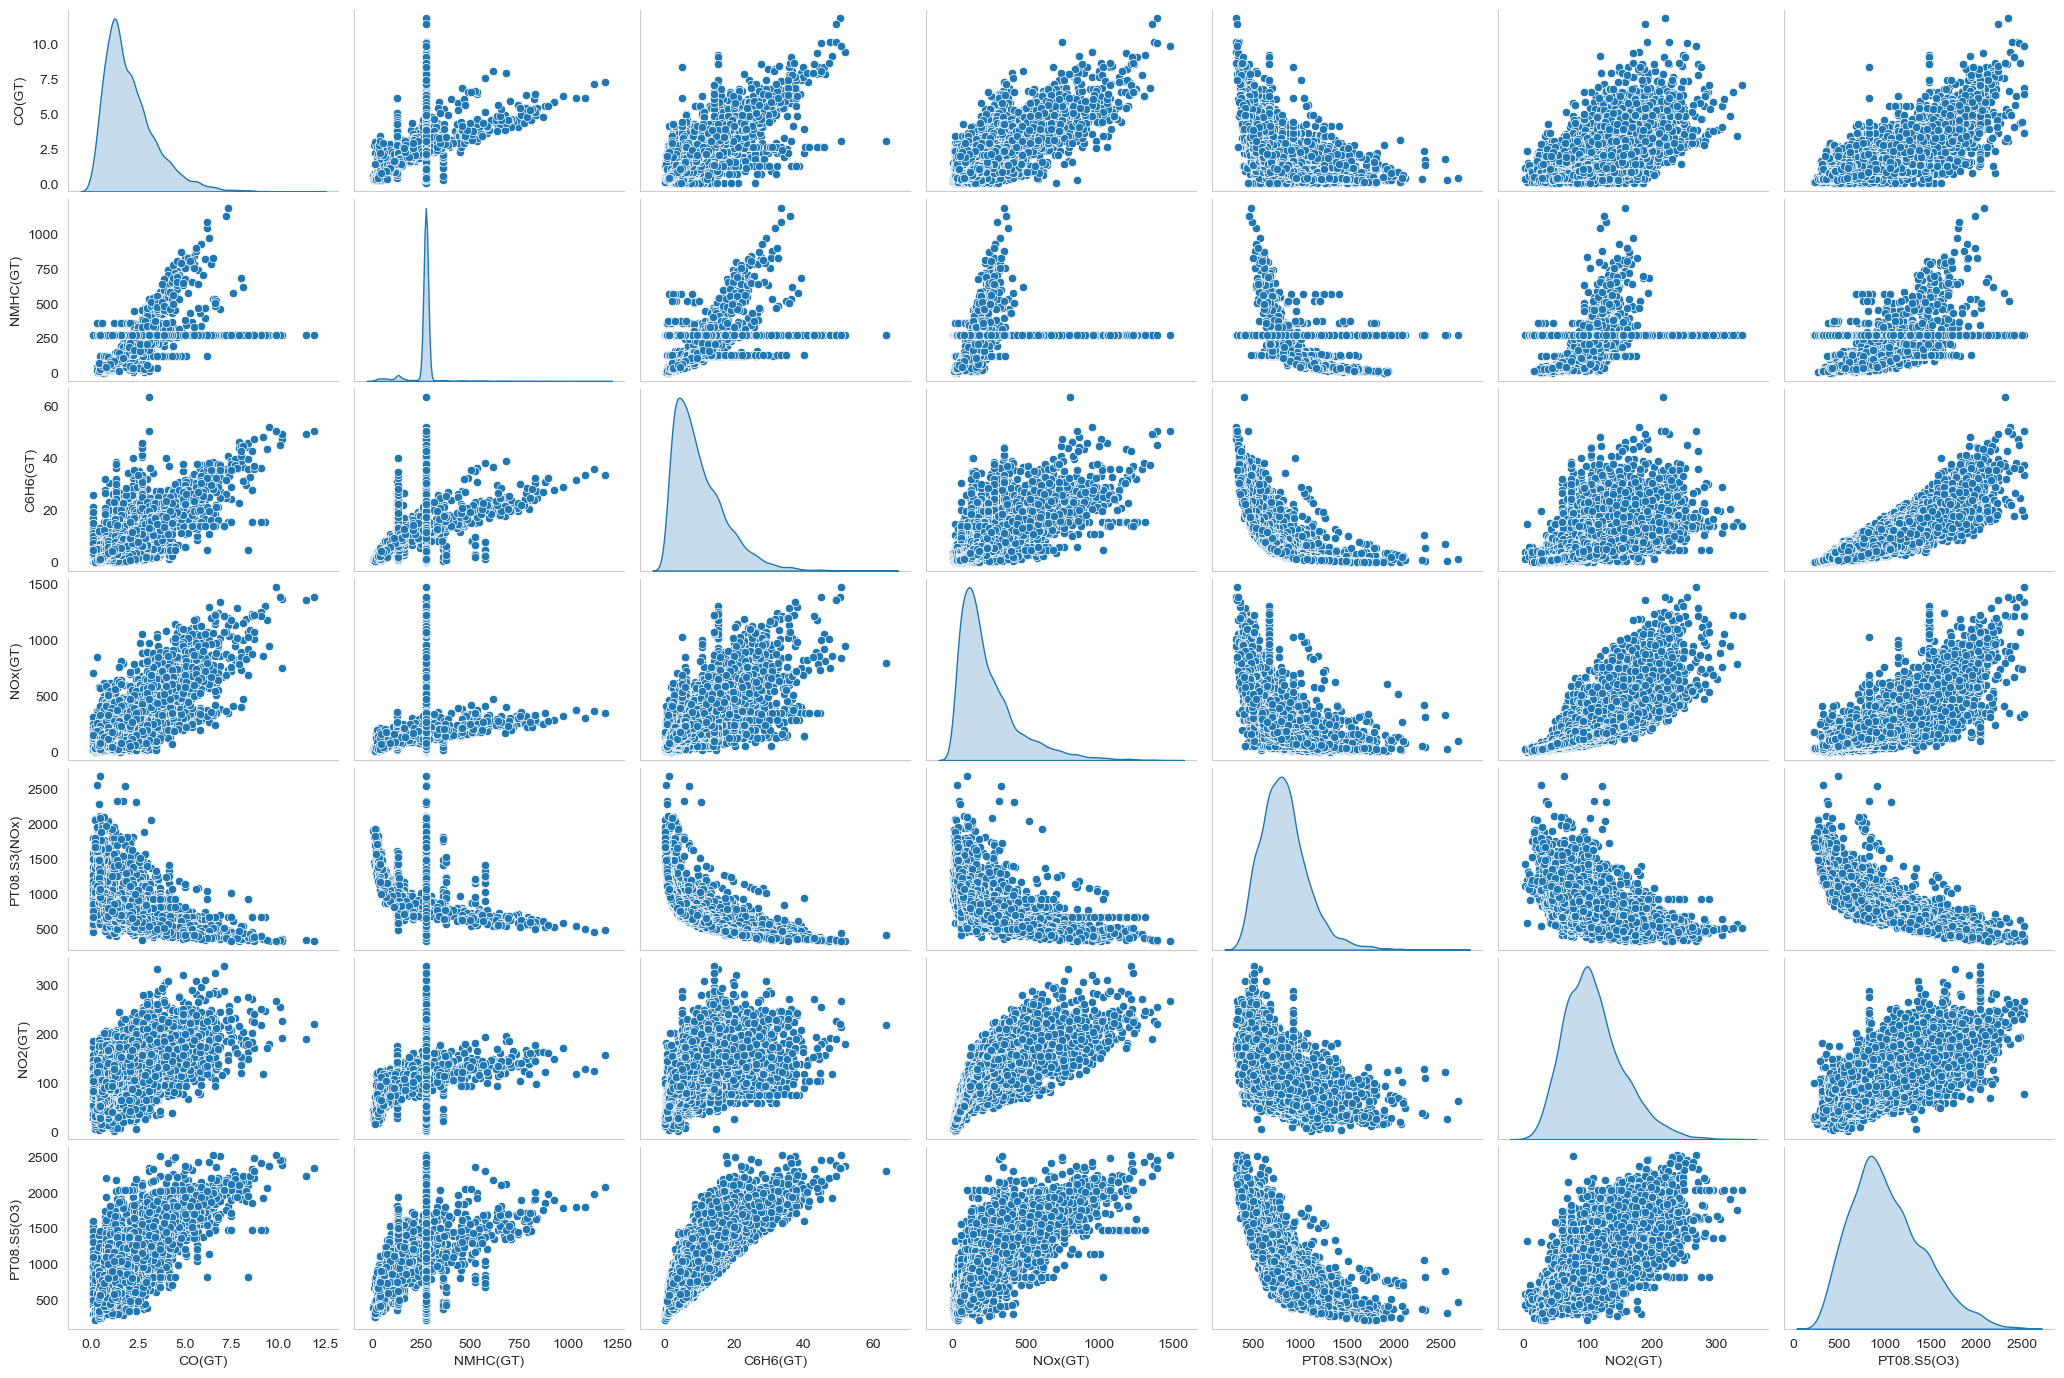

In [2023]:
# Drop columns 'Time'
eda_data = df.drop(['Time','PT08.S1(CO)','PT08.S2(NMHC)','PT08.S4(NO2)','T', 'AH','RH' ], axis=1)

# Set a custom background style
sns.set_style("whitegrid", {'axes.grid': False, 'grid.color': 'white'})

# Create a pairplot with additional customizations
fig = plt.figure(figsize=(50, 20), dpi=500)
sns.pairplot(eda_data, height=2, aspect=1.5, markers='o', diag_kind='kde')

# Add a title
fig.suptitle("Pairplot of Selected Variables", y=1.02)
plt.savefig('Variable corelation_pairplot.png')
# Display the plot
plt.show()

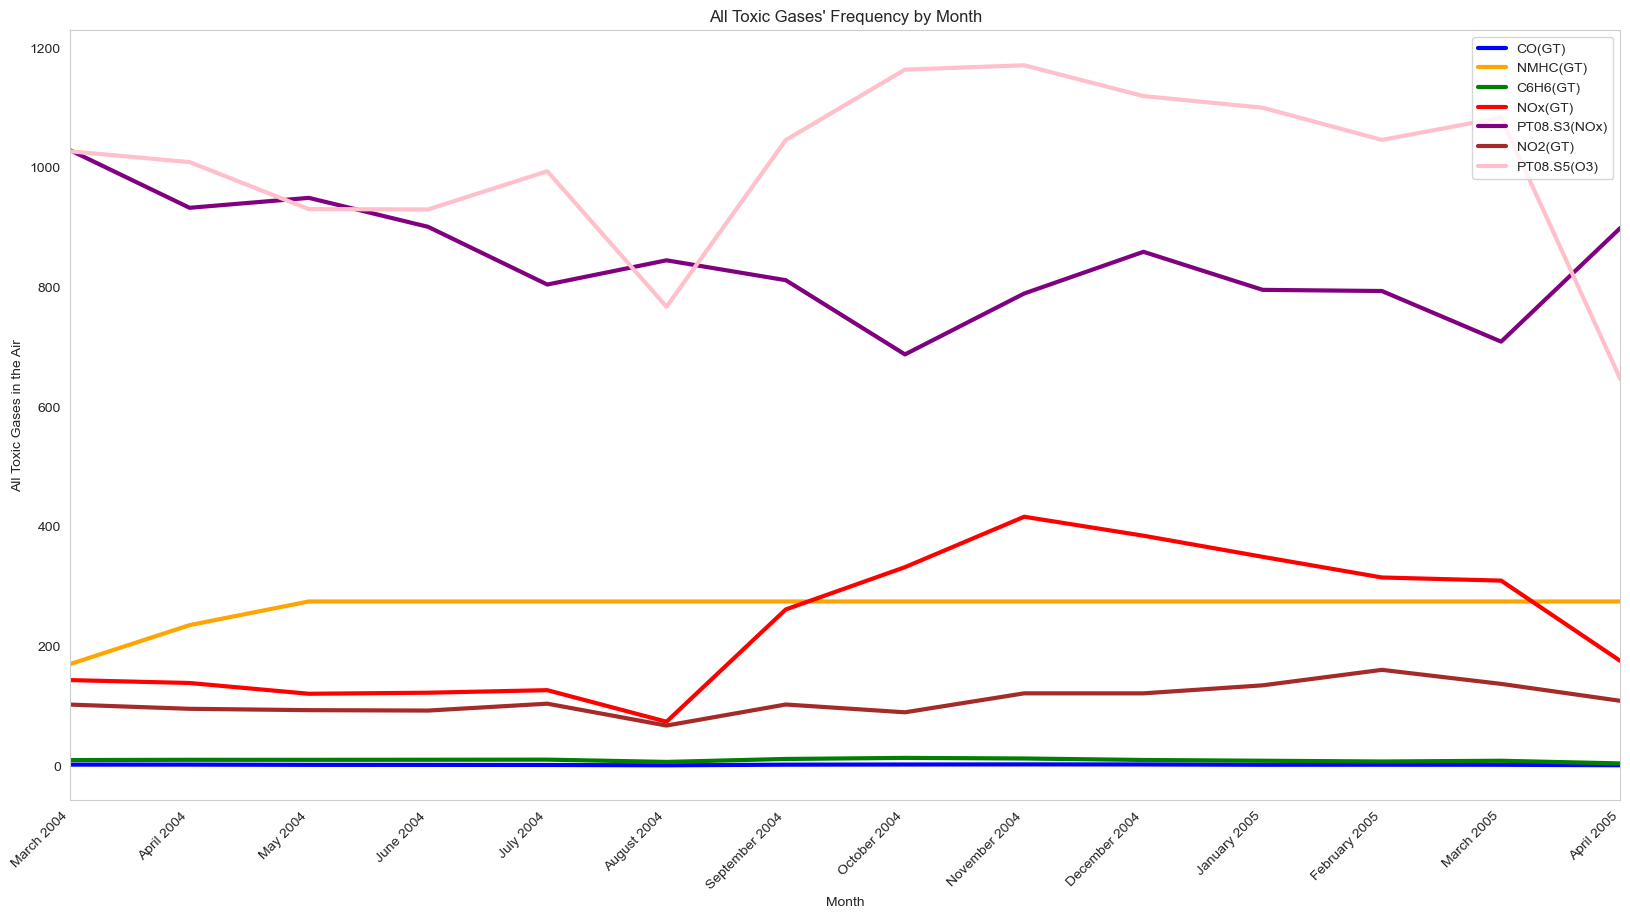

In [2024]:
df_line_data = df.drop(['Time','PT08.S1(CO)','PT08.S2(NMHC)','PT08.S4(NO2)','T', 'AH','RH'], axis=1)
#plt.legend(loc=1)
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black', 'teal', 'navy']
# Plotting
ax = df_line_data.resample('M').mean().plot(figsize=(20, 10), linewidth=3, color= colors)

# Customize x-axis ticks and labels
ax.set_xticks(df.resample('M').mean().index)
ax.set_xticklabels(df.resample('M').mean().index.strftime('%B %Y'), rotation=45, ha='right')

plt.legend(loc=1)
plt.xlabel('Month')
plt.ylabel('All Toxic Gases in the Air')
plt.title("All Toxic Gases' Frequency by Month")
plt.savefig('All toxic gases frequency by month.png')
plt.show()


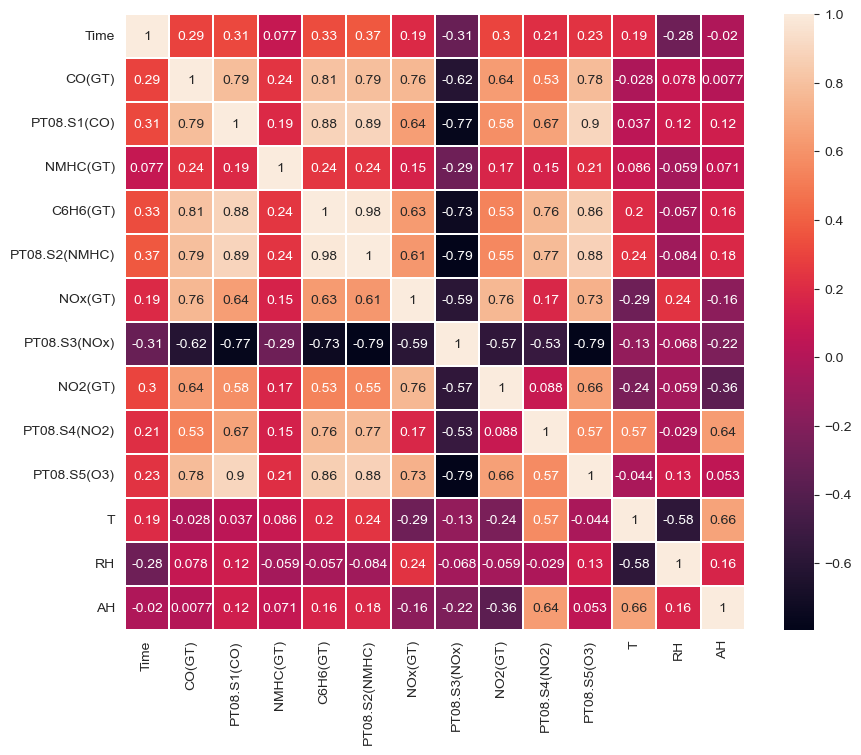

In [2025]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, linewidths=.20)
plt.savefig('heat map.png')
plt.show()

In [2026]:
def visualizeScatter(df, x, y, fill, title):
    fig = px.scatter(df, 
    x=x, 
    y=y, 
    color=fill, 
    #     facet_row=fill, 
    title=title)
    fig.show()

In [2027]:
visualizeScatter(df, 'NO2(GT)','PT08.S5(O3)', 'T','Concentrations over Temperature and Relative Humidity')

In [2028]:
visualizeScatter(df, 'CO(GT)','PT08.S5(O3)','T','Concentrations over Temperature and Absolute Humidity')

In [2029]:
df.corr()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Time,1.000000,0.294430,0.314981,0.077076,0.330690,0.373630,0.187111,-0.314374,0.303982,0.210427,0.233545,0.194279,-0.284506,-0.019982
CO(GT),0.294430,1.000000,0.788578,0.238354,0.809303,0.792345,0.758892,-0.616469,0.641499,0.526899,0.781178,-0.028404,0.077733,0.007650
PT08.S1(CO),0.314981,0.788578,1.000000,0.188501,0.881765,0.891432,0.643283,-0.772997,0.581820,0.670296,0.899364,0.036754,0.122558,0.123746
NMHC(GT),0.077076,0.238354,0.188501,1.000000,0.243200,0.238634,0.154831,-0.289807,0.172416,0.146579,0.212282,0.086010,-0.058808,0.070808
C6H6(GT),0.330690,0.809303,0.881765,0.243200,1.000000,0.982119,0.630209,-0.733228,0.531124,0.758704,0.860107,0.196024,-0.057244,0.164214
PT08.S2(NMHC),0.373630,0.792345,0.891432,0.238634,0.982119,1.000000,0.614795,-0.793522,0.553012,0.770820,0.875342,0.237256,-0.084066,0.183348
NOx(GT),0.187111,0.758892,0.643283,0.154831,0.630209,0.614795,1.000000,-0.592044,0.756066,0.173008,0.727523,-0.287481,0.235510,-0.158257
PT08.S3(NOx),-0.314374,-0.616469,-0.772997,-0.289807,-0.733228,-0.793522,-0.592044,1.000000,-0.565678,-0.529363,-0.794911,-0.131041,-0.067813,-0.222157
NO2(GT),0.303982,0.641499,0.581820,0.172416,0.531124,0.553012,0.756066,-0.565678,1.000000,0.088120,0.655205,-0.239713,-0.058770,-0.363468
PT08.S4(NO2),0.210427,0.526899,0.670296,0.146579,0.758704,0.770820,0.173008,-0.529363,0.088120,1.000000,0.571830,0.566553,-0.029202,0.635739


In [1740]:
### calculation of below  Air quality index), Ni( Nitrogen index) , Ci(Carbon index) index is done using the reference from the below website 
## https://d1wqtxts1xzle7.cloudfront.net/66839300/Air_quality_index_and_its_use_in_managem20210503-2765-mdg0k1.pdf?1620106308=&response-content-disposition=inline%3B+filename%3DAir_quality_index_and_its_use_in_managem.pdf&Expires=1704611589&Signature=NcAqBYH6gOUePhiuid~MzzDj3Yqj7EwWekCiFSIWDbQ03Fm~UdbSIHqk-liXNNx5VD1G1G7a-j~RkVyyf28I2ikUpajxfA3iE3Dks5XR6g2OTu5nIEuQoPpjz6k~nvFFZlrh-~E-zkvwjmpboekhkcM2iEZXPbeBzFksjw9XeWWCieM-kj1xVsz~PR~f32HoaXeWtFDxpjfXw6dhOvhg3Wr3BvaNe-Jn-PVWO3HLL9LBcrP7ZZqthsZ~kG80Lve0692FVeCTtb66tXAtl2ethndbkKeF1TzCme4G6~c1SU86of~72xYKeWkmSt2gu9Poluur~6S3KzZQ5oP2FNnCXg__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA
## Threshold value for the Nitrogen and Carbon Monooxide can be found in the link above
df['Ni'] = (df['NO2(GT)']/200)* 100
df['Ci'] = (df['CO(GT)']/15)* 100
df['AQI'] =  df[['Ni', 'Ci']].max(axis=1)

In [1741]:
df_new = df

In [1742]:
df_scaled = df_new

In [1743]:
df_scaled

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Ni,Ci,AQI
Date,,,,,,,,,,,,,,,,,
2004-03-10,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,56.5,17.333333,56.5
2004-03-10,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,46.0,13.333333,46.0
2004-03-10,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,57.0,14.666667,57.0
2004-03-10,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,61.0,14.666667,61.0
2004-03-10,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,58.0,10.666667,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04,10,3.1,1314.0,275.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,95.0,20.666667,95.0
2005-04-04,11,2.4,1163.0,275.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,89.5,16.000000,89.5
2005-04-04,12,2.4,1142.0,275.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,87.5,16.000000,87.5


In [1744]:
numeric_columns = df_scaled.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

# Fit and transform the selected columns
df_scaled = scaler.fit_transform(df_scaled)

In [1745]:
df_scaled = pd.DataFrame(df_scaled, columns=['Time','CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH','Ni','Ci','AQI'])

In [1746]:
df_scaled

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Ni,Ci,AQI
0,0.939133,0.374049,1.209381,-1.644768,0.250960,0.409211,-0.365594,0.870605,0.078548,0.703235,0.606116,-0.517080,-0.022576,-0.645579,0.078548,0.374049,0.078136
1,1.083583,-0.059705,0.893387,-2.182367,-0.088355,0.064681,-0.679303,1.336249,-0.377421,0.316821,-0.136824,-0.551042,-0.092344,-0.725612,-0.377421,-0.059705,-0.378212
2,1.228033,0.084879,1.404553,-2.521904,-0.142646,0.004104,-0.539877,1.202081,0.100261,0.305200,0.119189,-0.709535,0.273939,-0.664411,0.100261,0.084879,0.099867
3,1.372483,0.084879,1.283732,-2.635082,-0.115500,0.038179,-0.335717,1.012666,0.273963,0.389456,0.442970,-0.811423,0.622779,-0.573971,0.273963,0.084879,0.273713
4,1.516933,-0.348875,0.800448,-3.045356,-0.481961,-0.385858,-0.539877,1.458580,0.143686,0.116351,0.209546,-0.788781,0.599523,-0.568768,0.143686,-0.348875,0.143328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,-0.216467,0.735510,0.995620,0.123652,0.468122,0.617443,1.158137,-1.169551,1.750435,-0.220671,1.763195,0.422556,-1.162122,-0.648057,1.750435,0.735510,1.751412
9353,-0.072017,0.229464,0.293929,0.123652,0.183097,0.337276,0.565575,-0.913051,1.511594,-0.540261,0.608626,0.694258,-1.487706,-0.759310,1.511594,0.229464,1.512372
9354,0.072433,0.229464,0.196342,0.123652,0.318823,0.473573,0.266804,-0.916998,1.424742,-0.607085,0.164367,0.988601,-1.801662,-0.935977,1.424742,0.229464,1.425449
9355,0.216883,0.012587,-0.449585,0.123652,-0.074782,0.087397,-0.022008,-0.526329,1.012199,-1.188158,-0.643831,1.147094,-2.080735,-1.249915,1.012199,0.012587,1.012563


In [1789]:
df_scaled.columns

Index(['Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Ni', 'Ci', 'AQI'],
      dtype='object')

In [1982]:
#####Input1 for our model1 ########
#X=df_scaled[[ 'CO(GT)', 'NMHC(GT)', 'C6H6(GT)','NOx(GT)', 'NO2(GT)']]
#####Input2 for our model2 ########
X=df_scaled[[ 'CO(GT)', 'NMHC(GT)', 'C6H6(GT)','NOx(GT)', 'NO2(GT)','PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','AQI','T']]

y=df_scaled['PT08.S5(O3)']

In [1983]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102)

In [1984]:
lm = LinearRegression()

In [1985]:
lm.fit(X_train, y_train)

LinearRegression()

In [1986]:
print(lm.intercept_)

-0.0027336520690024214


In [1987]:
coeff_data = pd.DataFrame(lm.coef_, index=X.columns, columns=['Coefficient'])
coeff_data

,Coefficient
CO(GT),-0.039459
NMHC(GT),0.004800
C6H6(GT),-0.095467
NOx(GT),0.151574
NO2(GT),-0.835474
PT08.S1(CO),0.349053
PT08.S2(NMHC),0.443575
PT08.S3(NOx),-0.121303
PT08.S4(NO2),0.070290
AQI,0.890647


In [1988]:
prediction = lm.predict(X_test)

Text(0.5, 1.0, 'Linear Regression Predicted vs Actual')

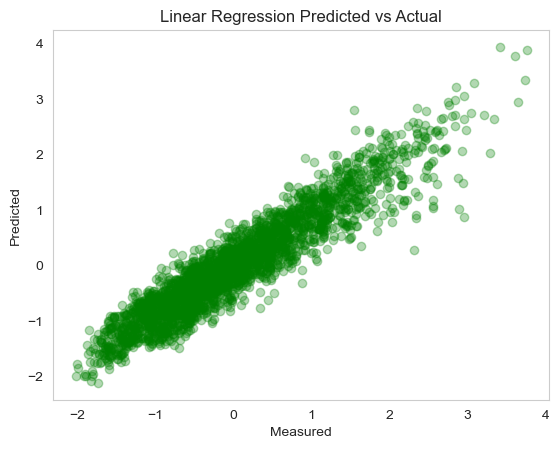

In [2005]:
plt.scatter(y_test, prediction, c="green", alpha=0.3)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual')

In [1990]:
linear_regression_score = lm.score(X_test, y_test)
linear_regression_score

0.8802104338920226

<Axes: xlabel='PT08.S5(O3)', ylabel='Count'>

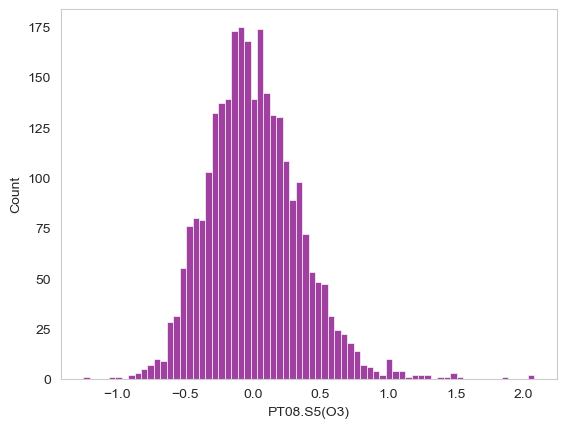

In [1991]:
sns.histplot((y_test-prediction), bins=70, color="purple")

In [1992]:
y_pred = lm.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2) Score: {r2}')

R-squared (R2) Score: 0.8802104338920226


In [1993]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test, prediction))
print('MSE:',metrics.mean_squared_error(y_test, prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.26666451538447505
MSE: 0.11888033733552154
RMSE: 0.3447902802219366


In [1759]:
df['AQI'].max()

170.0

In [1717]:
#df_scaled_regression.drop(df_scaled_regression.index,inplace=True)

In [1761]:
df_new.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Ni,Ci,AQI
Date,,,,,,,,,,,,,,,,,
2004-03-10,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,56.5,17.333333,56.5
2004-03-10,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,46.0,13.333333,46.0
2004-03-10,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,57.0,14.666667,57.0
2004-03-10,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,61.0,14.666667,61.0
2004-03-10,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,58.0,10.666667,58.0


In [1762]:
df_scaled_LogRegression = df_new

In [1763]:
df_scaled_LogRegression

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Ni,Ci,AQI
Date,,,,,,,,,,,,,,,,,
2004-03-10,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,56.5,17.333333,56.5
2004-03-10,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,46.0,13.333333,46.0
2004-03-10,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,57.0,14.666667,57.0
2004-03-10,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,61.0,14.666667,61.0
2004-03-10,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,58.0,10.666667,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04,10,3.1,1314.0,275.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,95.0,20.666667,95.0
2005-04-04,11,2.4,1163.0,275.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,89.5,16.000000,89.5
2005-04-04,12,2.4,1142.0,275.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,87.5,16.000000,87.5


In [1764]:
def AQI_Range(x):
    if x<=0:
        return "Very Good"
    elif x>0 and x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=150:
        return "Unhealthy"
    elif x>150 and x<=200:
        return "Poor"
    elif x>200:
        return "Very poor"

df_scaled_LogRegression['AQI_Range'] = df_scaled_LogRegression['AQI'] .apply(AQI_Range)
df_scaled_LogRegression.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Ni,Ci,AQI,AQI_Range
Date,,,,,,,,,,,,,,,,,,
2004-03-10,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,56.5,17.333333,56.5,Moderate
2004-03-10,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,46.0,13.333333,46.0,Good
2004-03-10,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,57.0,14.666667,57.0,Moderate
2004-03-10,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,61.0,14.666667,61.0,Moderate
2004-03-10,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,58.0,10.666667,58.0,Moderate


In [1772]:
df_scaled_LogRegression['AQI_label'] = df_scaled_LogRegression['AQI_Range'].astype('category')
cat_columns = df_scaled_LogRegression.select_dtypes(['category']).columns
df_scaled_LogRegression[cat_columns] = df_scaled_LogRegression[cat_columns].apply(lambda x: x.cat.codes)

df_scaled_LogRegression['AQI_label'].unique()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Ni,Ci,AQI,AQI_Range,AQI_label
Date,,,,,,,,,,,,,,,,,,,
2004-03-10,18,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,56.5,17.333333,56.5,Moderate,1
2004-03-10,19,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,46.0,13.333333,46.0,Good,0
2004-03-10,20,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,57.0,14.666667,57.0,Moderate,1
2004-03-10,21,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,61.0,14.666667,61.0,Moderate,1
2004-03-10,22,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,58.0,10.666667,58.0,Moderate,1


In [1774]:
def AQI_Range_Binary_Label(x):
    if x<=54:
        return 0
    elif x>54:
        return 1
    
df_scaled_LogRegression['AQI_Range_Binary'] = df_scaled_LogRegression['AQI'] .apply(AQI_Range_Binary_Label)

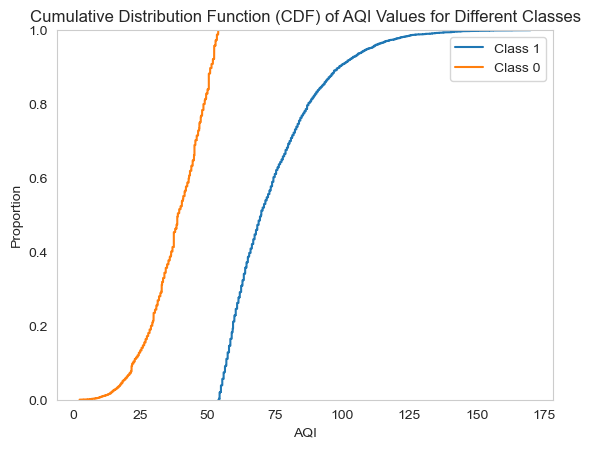

In [1932]:
import numpy as np

for outcome_class in df_scaled_LogRegression['AQI_Range_Binary'].unique():
    data_class = df_scaled_LogRegression[df_scaled_LogRegression['AQI_Range_Binary'] == outcome_class]['AQI']
    sns.ecdfplot(data=data_class, label=f'Class {outcome_class}')

plt.title('Cumulative Distribution Function (CDF) of AQI Values for Different Classes')
plt.legend()
plt.show()

In [2055]:
def logistic_regression(x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=102)
    #sc = StandardScaler()
    
    # Feature scaling
    #x_train = sc.fit_transform(x_train)
   # x_test = sc.fit_transform(x_test)
    
    #Fitting logistic regression to the training set
    classifier = LogisticRegression(random_state = 102,max_iter=1000)
    classifier.fit(x_train,y_train)
    
    
    # Logistic regression cross validation
    #Kfold = KFold(len(ranked_predictors), shuffle=False)
    #print("KfoldCrossVal mean score using Logistic regression is %s \n" %cross_val_score(classifier,x,y,cv=10).mean())
    k_fold = KFold(n_splits=10, shuffle=True, random_state=102)
    cvs=cross_val_score(classifier, x_train, y_train, cv=k_fold).mean()
    print("KfoldCrossVal mean score using Logistic regression is %s \n"%cvs)
    
    print("Logistic Analysis Report")
    y_pred = classifier.predict(x_test)
    print(classification_report(y_test,y_pred))
    print(y_pred)
    #Accuracy score
    print ("Accuracy Score:%.2f" % metrics.accuracy_score(y_test,classifier.predict(x_test)))
    #probabilty of dependent variable
    y_pred_proba = classifier.predict_proba(x_test)[::,1]
    print('Probabilty of dependent variable')
    print(y_pred_proba.mean())
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend(loc=4)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [2056]:
import statsmodels.api as sm
def logit_summary(y,X):
    logit_model=sm.Logit(y,X)
    result=logit_model.fit()
    print("Model Summary")
    print(result.summary2())

In [2057]:
df_scaled_LogRegression.columns

Index(['Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Ni', 'Ci', 'AQI', 'AQI_Range',
       'AQI_label', 'AQI_Range_Binary'],
      dtype='object')

KfoldCrossVal mean score using Logistic regression is 0.8391065266956849 

Logistic Analysis Report
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1284
           1       0.82      0.78      0.80      1056

    accuracy                           0.83      2340
   macro avg       0.83      0.82      0.82      2340
weighted avg       0.83      0.83      0.83      2340

[0 0 0 ... 0 0 0]
Accuracy Score:0.83
Probabilty of dependent variable
0.453073950810539


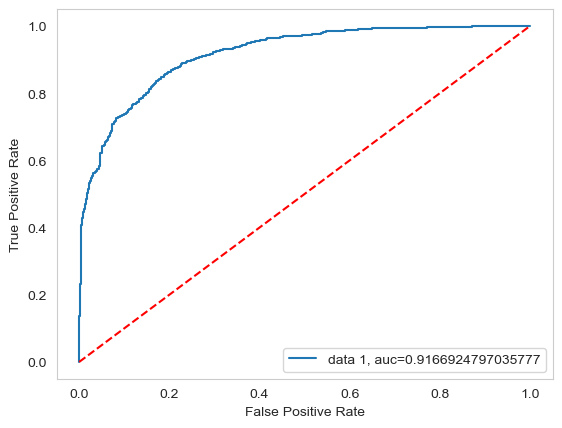

Optimization terminated successfully.
         Current function value: 0.357533
         Iterations 8
Model Summary
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.480    
Dependent Variable: AQI_Range_Binary AIC:              6706.8695
Date:               2024-01-11 04:34 BIC:              6764.0205
No. Observations:   9357             Log-Likelihood:   -3345.4  
Df Model:           7                LL-Null:          -6438.4  
Df Residuals:       9349             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
CO(GT)           0.4964   0.0486  10.2141 0.0000  0.4012  0.5917
NMHC(GT)         0.0021   0.0005   4.4301 0.0000  0.0012  0.0031

In [2058]:
# AQI_Range_Binary as target variable  
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
x=df_scaled_LogRegression[[
       'CO(GT)', 'NMHC(GT)', 'C6H6(GT)','NOx(GT)','PT08.S5(O3)','T', 'RH', 'AH']]


y=df_scaled_LogRegression['AQI_Range_Binary']

logistic_regression(x,y)
logit_summary(y,x)